# Computer Vision color spaces

### Import statements

In [68]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### To edit an image making a copy of it is always a good idea!

In [69]:
# Load an image
# And make a copy of the original image to avoid manipulating the original image

img_origin = cv2.imread('m.jpg')
img = img_origin.copy()


[Hint](# "Numpy .copy function") 

## Color Spaces

### BGR Spliting the color channels

In [70]:
# Load a color image and split in is different B, G and R channels
R, G, B = cv2.split(img)
B

array([[ 89,  86,  80, ..., 134, 111,  98],
       [ 87,  84,  78, ..., 109,  98,  95],
       [ 84,  81,  77, ...,  97, 101, 107],
       ...,
       [ 31,  31,  29, ...,  48,  50,  53],
       [ 31,  31,  30, ...,  48,  50,  53],
       [ 30,  31,  31, ...,  48,  50,  53]], dtype=uint8)

[Hint](# "cv2.split") 

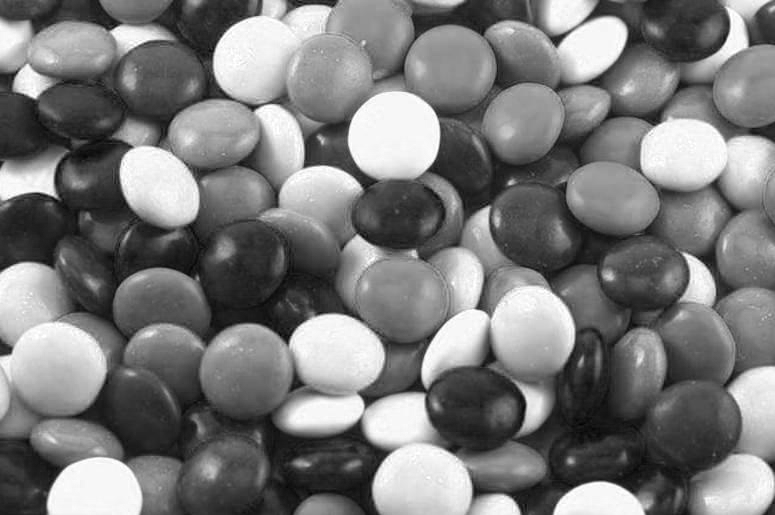

In [71]:
# Show each channel channel on screen
from google.colab.patches import cv2_imshow
cv2_imshow(B)


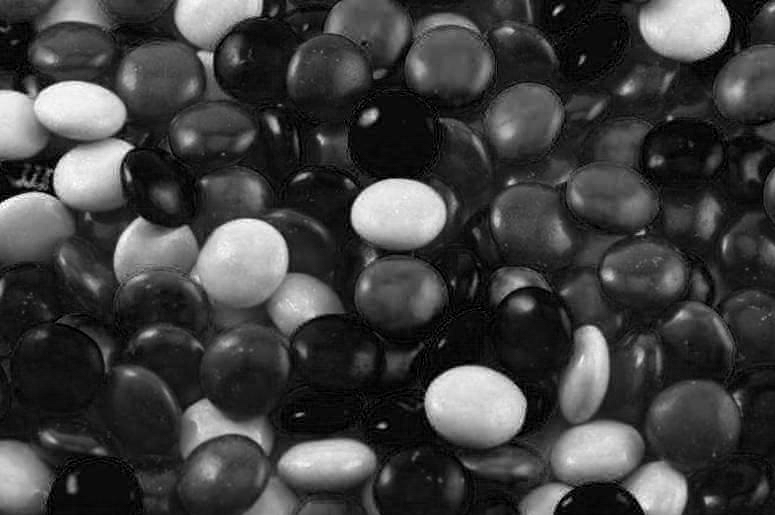

In [72]:
cv2_imshow(R)

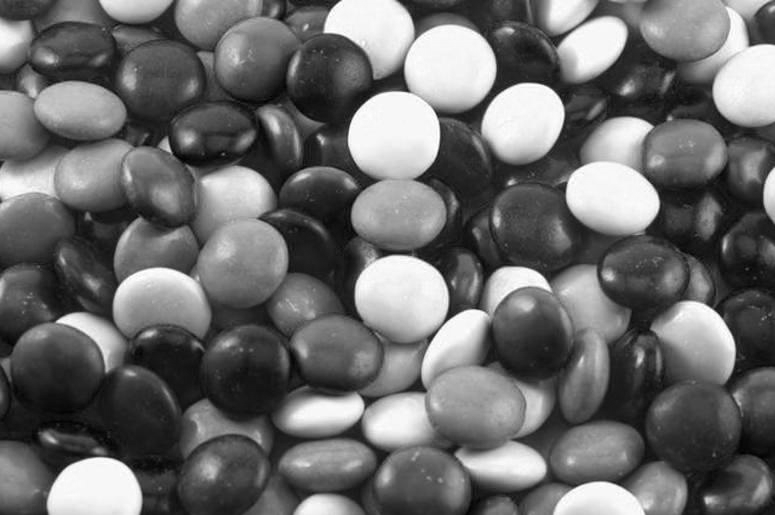

In [73]:
cv2_imshow(G)

#### Merging the color channels

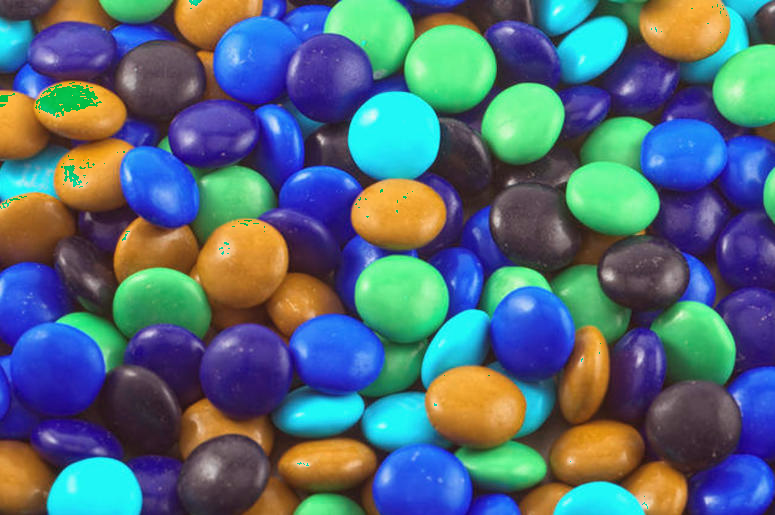

In [74]:
# Modify a channel and then merge them all again
R_t = R + 20
img = cv2.merge((B,G,R_t))
cv2_imshow(img)

In [75]:
img.shape

(515, 775, 3)

[Hint](# "cv2.merge") 

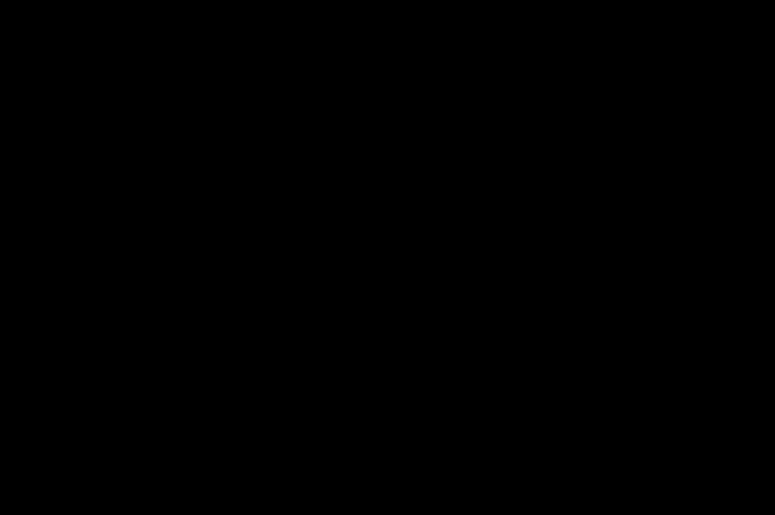

In [76]:
# Create a black canvas with the same size as the image you loaded
black_image = np.zeros(img.shape[:2], np.uint8)
cv2_imshow(black_image)

[Hint](# "use numpy np.zeros function with the img.shape[:2]") 

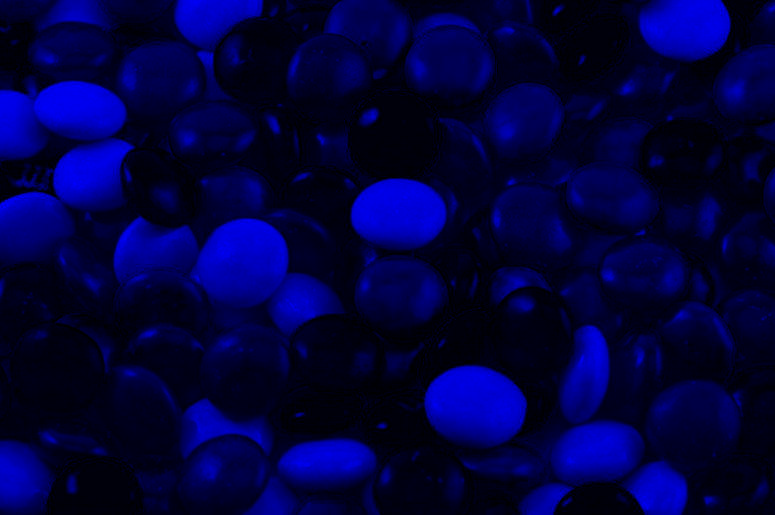

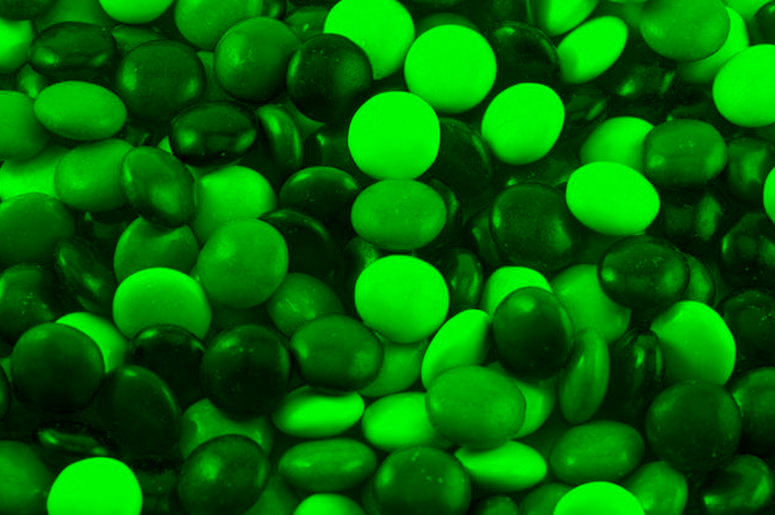

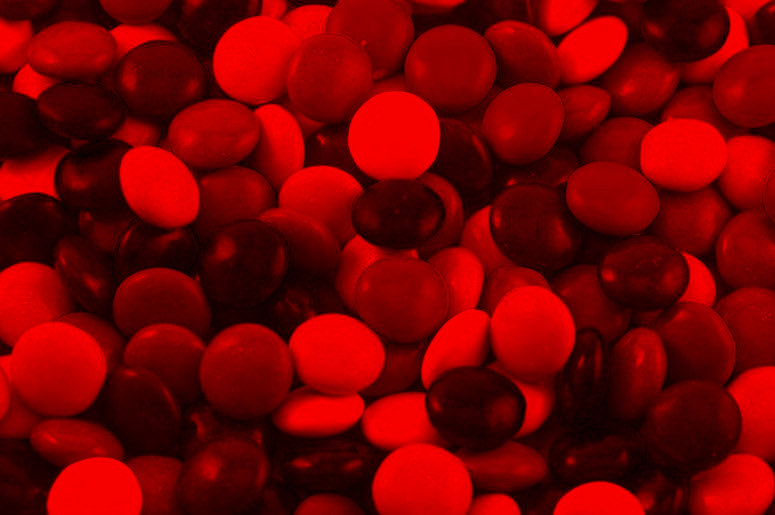

In [77]:
# Merge each channel with the black canvas 
# So you will end up with 3 images: (Red,Black,Black), (Black,Green,Black) and (Black,Black,Blue) 
# Assuming you are working with RGB, but BGR is also fine

temp_img_1 = cv2.merge((R,black_image, black_image))
temp_img_2 = cv2.merge((black_image, G, black_image))
temp_img_3 = cv2.merge((black_image, black_image, B))
cv2_imshow(temp_img_1)
cv2_imshow(temp_img_2)
cv2_imshow(temp_img_3)

[Hint](# "cv2.merge") 

### HSV: Hue Saturation Value

#### M&Ms challenge!

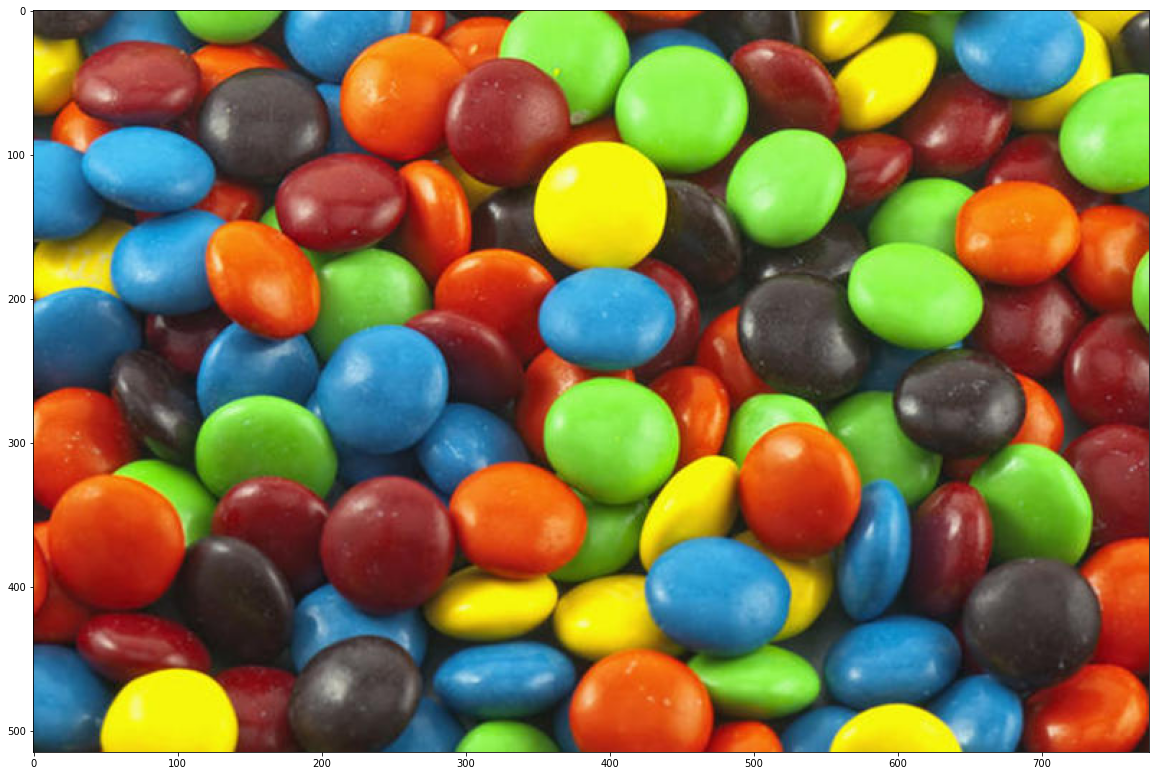

In [86]:
# Use the image below and convert it from BGR to HSV
img = cv2.imread('m.jpg')
plt.figure(figsize = (20,15));
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB));

In [91]:
# Split the H,S and V channels 
image = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
#plt.imshow(cv2.cvtColor(image,cv2.COLOR_HSV2RGB))
H, S, V = cv2.split(image)
H

array([[11, 11, 11, ..., 25, 23, 20],
       [13, 13, 11, ..., 23, 22, 19],
       [13, 13, 13, ..., 19, 17, 17],
       ...,
       [92, 95, 93, ...,  6,  6,  5],
       [95, 95, 95, ...,  6,  6,  5],
       [98, 98, 95, ...,  6,  6,  5]], dtype=uint8)

[Hint](# "cv2.cvtColor") 

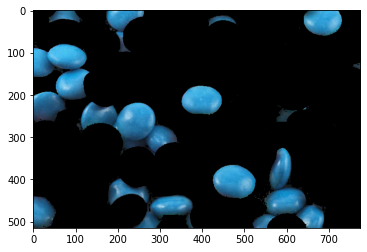

In [108]:
# Create a mask to filter out the Blue M&Ms (remember you need a lower and upper range)
# Make a copy of the hsv image and apply the mask to it, then display the image
lower_range = (90, 45, 0)
upper_range = (130, 255, 255)
mask_b = cv2.inRange(image, lower_range, upper_range)
blue = image.copy()
blue[mask_b == 0] = [0,0,0]
plt.imshow(cv2.cvtColor(blue,cv2.COLOR_HSV2RGB))

[Hint](# "cv2.inRange") 

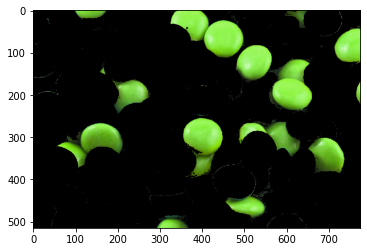

In [109]:
# Repeat the same but now with the greens
lower_range = (40, 45, 0)
upper_range = (80, 255, 255)
mask_g = cv2.inRange(image, lower_range, upper_range)
green = image.copy()
green[mask_g == 0] = [0,0,0]
plt.imshow(cv2.cvtColor(green,cv2.COLOR_HSV2RGB))

In [110]:
# Now combine both masks togheter so we can see all greens and blues in the same image!
sum = mask_g + mask_b

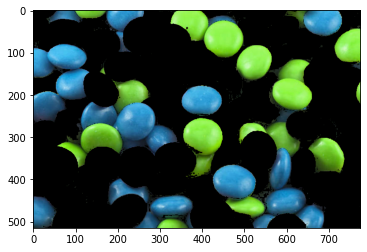

In [111]:
# Now lets combine both masks but also some opacity, we want to be able to see all M&Ms but
# Blues and greens will show as int he image above while the other colors will be faded out with some opacity
# You just need to add alpha to apply opacity to the dark parts of the mask, then display the image

sum_img = image.copy()
sum_img[sum == 0] = [0,0,0]
plt.imshow(cv2.cvtColor(sum_img,cv2.COLOR_HSV2RGB))

[Hint](# "cv2.addWeighted") 

In [84]:
# Below you will find an example with oranges and greens just for reference so you can see what we want to accomplish
# In this example the oranges are not perfect, and it can be improved a lot easily.

## Mini project

### Level 1

#### Ball tracker

1. Given an image with a ball on it isolate the ball

### Level 2

#### Ball tracker

1. Make it track a ball in real time (either with a video or a webcam)

### Level 3

#### Ball Tracker

1. Can you make it track two or more different color balls at the same time?